In [1]:
import matplotlib.pylab as plt
from models.scripts.utils import load_csv, split_date, split_data_frame, apply_moving_average_for_roc, impute_rolling_median, add_seasonality, create_lags

In [2]:
df = load_csv('data/btc_timeseries.csv')
df = split_date(df, 'time')
df = impute_rolling_median(df, 5)
df = add_seasonality(df)

/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs


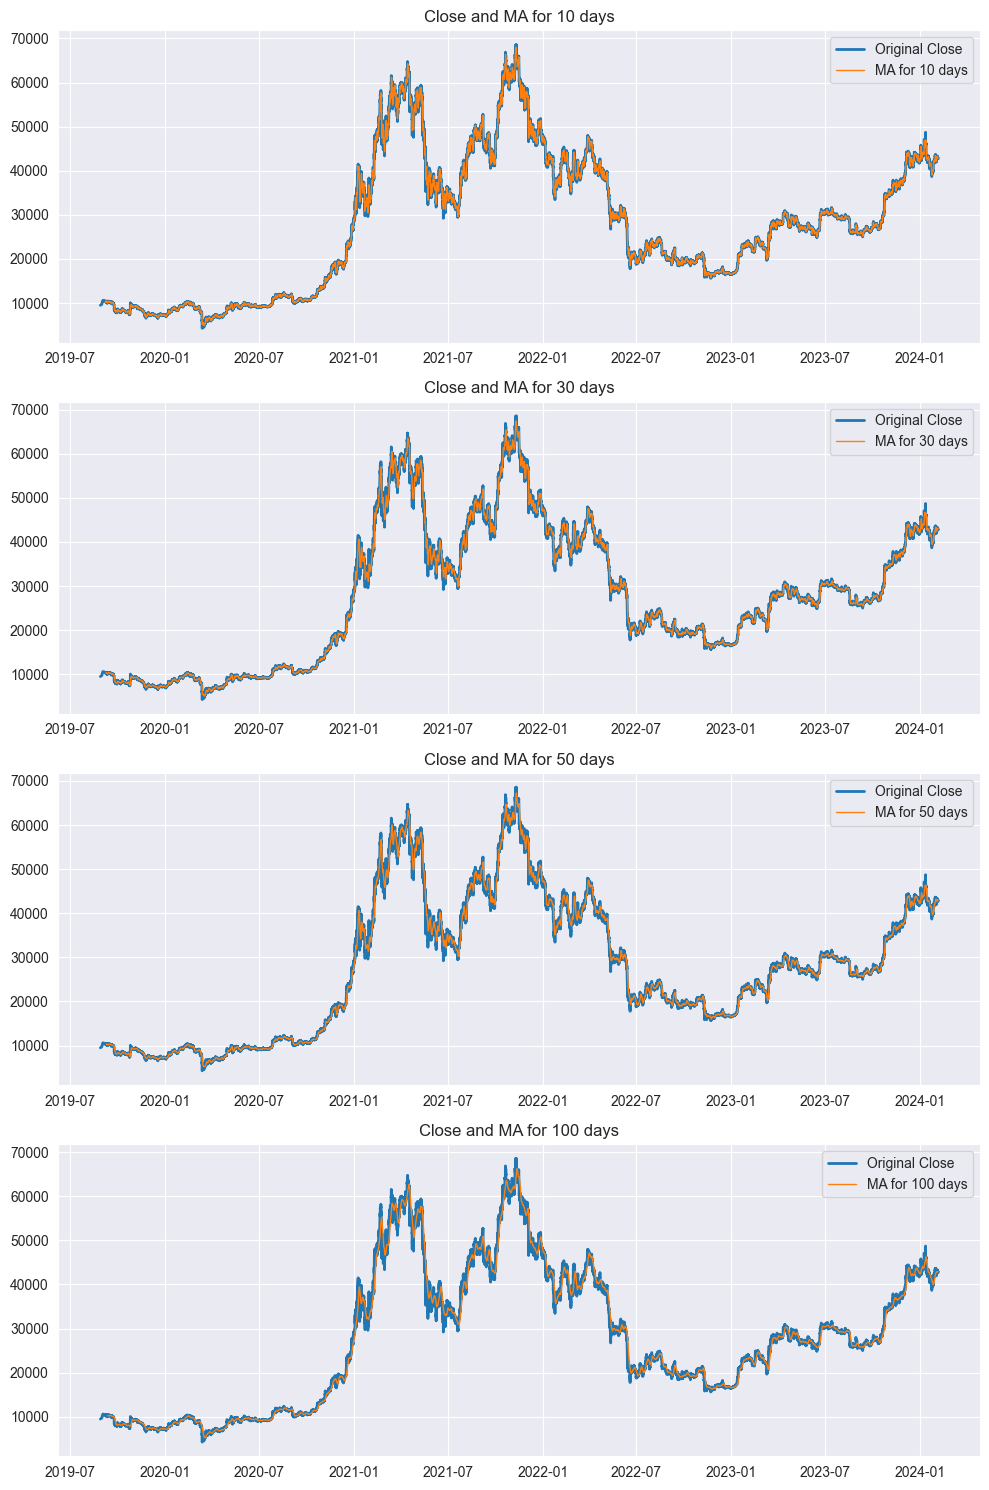

In [3]:
ma_day = [10, 30, 50, 100]
df_ma = df.copy()

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_ma[column_name] = df_ma['close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    column_name = f"MA for {ma} days"
    axes[i].plot(df_ma['time'],df_ma['close'], label='Original Close', linewidth=2)
    axes[i].plot(df_ma['time'],df_ma[column_name], label=f'{column_name}', linewidth=1)
    axes[i].set_title(f'Close and {column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [4]:
train, val, test = split_data_frame(df_ma)

In [5]:
train = create_lags(train, 3)
val = create_lags(val, 3)
test = create_lags(test, 3)

In [6]:
train = apply_moving_average_for_roc(dataframe=train, ma_type='ma', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ma', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ma', roc_window=10)

In [7]:
train.tail()

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,MA for 10 days,MA for 30 days,MA for 50 days,MA for 100 days,lag_1,lag_2,lag_3,ROC_0,ROC_1,ROC_2
27054,1665309600,2022-10-09 10:00:00,19418.383064,19418.383064,19508.255617,19412.507629,1.821003e+09,1.645164e+10,3.723296e+11,19174043.0,...,19401.962678,19453.569804,19526.170650,19819.290443,19404.001206,19419.831413,19434.075728,0,1,0
27055,1665313200,2022-10-09 11:00:00,19485.868821,19485.868821,19528.267554,19478.972189,1.337904e+09,1.654506e+10,3.736236e+11,19174043.0,...,19410.093848,19454.463030,19516.287773,19811.573802,19418.383064,19404.001206,19419.831413,0,1,0
27056,1665316800,2022-10-09 12:00:00,19477.479136,19477.479136,19533.704328,19477.479136,1.240765e+09,1.655192e+10,3.734642e+11,19174043.0,...,19418.390378,19453.276269,19506.239975,19803.849718,19485.868821,19418.383064,19404.001206,0,1,0
27057,1665320400,2022-10-09 13:00:00,19510.001122,19510.001122,19514.760400,19478.761438,9.782865e+08,1.659344e+10,3.740878e+11,19174043.0,...,19431.162549,19452.971982,19496.782925,19797.348863,19477.479136,19485.868821,19418.383064,0,1,0
27058,1665324000,2022-10-09 14:00:00,19478.013873,19478.013873,19517.540994,19476.386355,1.152909e+09,1.655383e+10,3.734761e+11,19174043.0,...,19442.248864,19451.859303,19486.379875,19791.064974,19510.001122,19477.479136,19485.868821,0,1,0


### Exponential Moving Average

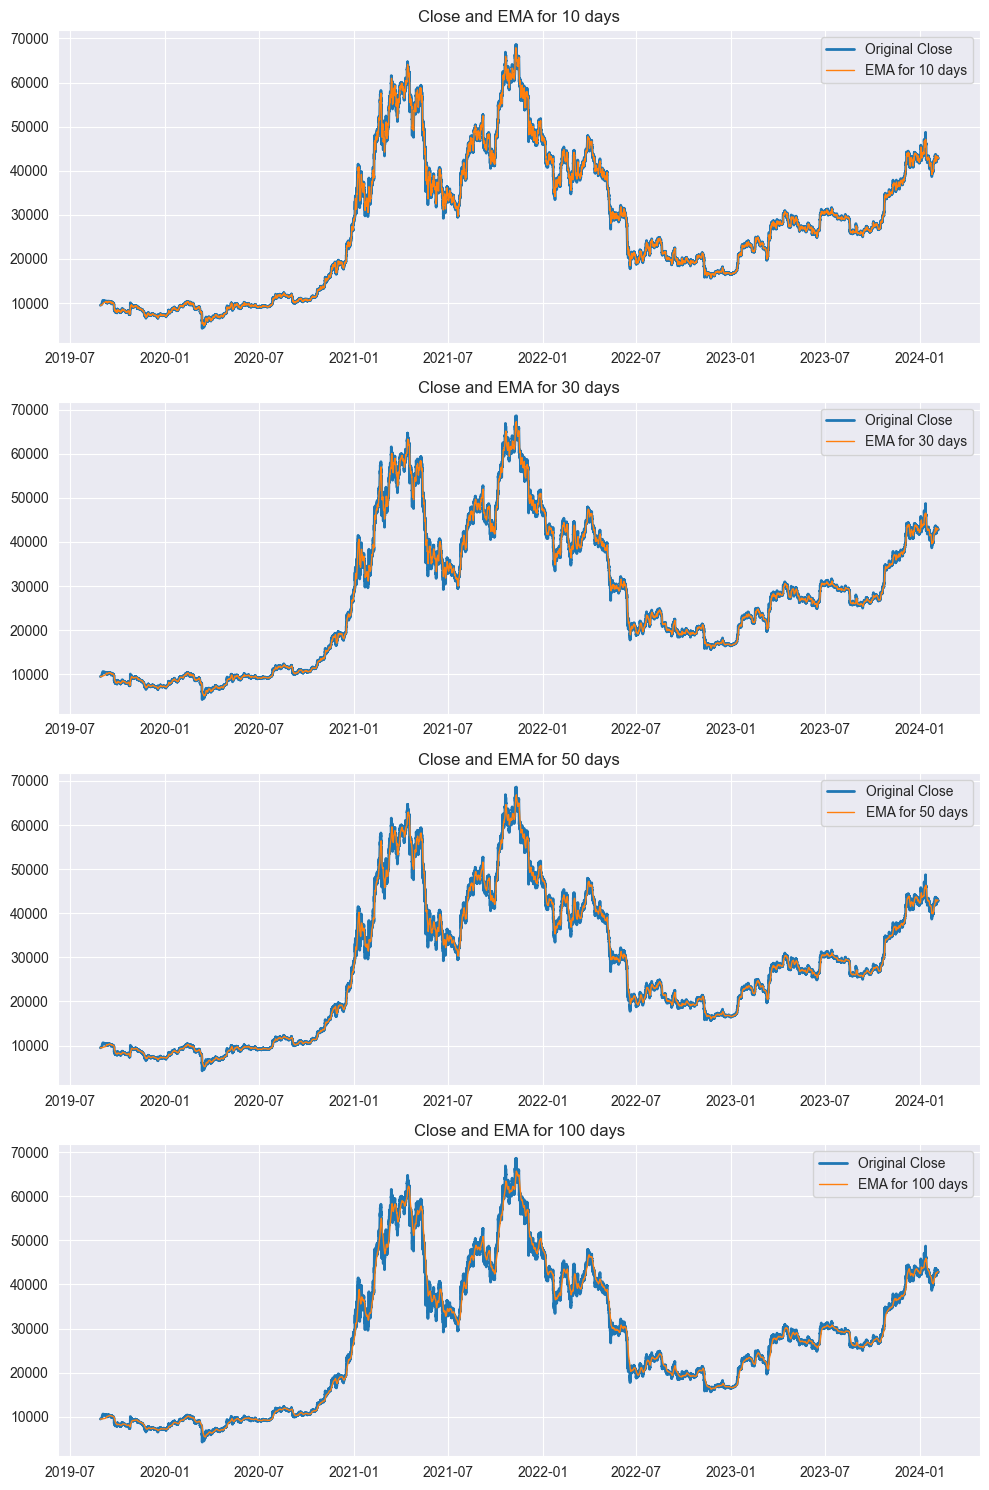

In [8]:
ma_day = [10, 30, 50, 100]
df_ema = df.copy()
for ma in ma_day:
    ema_column_name = f"EMA for {ma} days"
    df_ema[ema_column_name] = df_ema['close'].ewm(span=ma, adjust=False).mean()

fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    ema_column_name = f"EMA for {ma} days"
    axes[i].plot(df_ema['time'], df_ema['close'], label='Original Close', linewidth=2)
    axes[i].plot(df_ema['time'], df_ema[ema_column_name], label=f'{ema_column_name}', linewidth=1)
    axes[i].set_title(f'Close and {ema_column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
train, val, test = split_data_frame(df_ema)

train = create_lags(train, 3)
val = create_lags(val, 3)
test = create_lags(test, 3)

train = apply_moving_average_for_roc(dataframe=train, ma_type='ema', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ema', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ema', roc_window=10)

In [10]:
train.tail()

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,EMA for 10 days,EMA for 30 days,EMA for 50 days,EMA for 100 days,lag_1,lag_2,lag_3,ROC_0,ROC_1,ROC_2
27054,1665309600,2022-10-09 10:00:00,19418.383064,19418.383064,19508.255617,19412.507629,1.821003e+09,1.645164e+10,3.723296e+11,19174043.0,...,19412.154361,19469.014739,19548.953755,19655.592784,19404.001206,19419.831413,19434.075728,0,1,1
27055,1665313200,2022-10-09 11:00:00,19485.868821,19485.868821,19528.267554,19478.972189,1.337904e+09,1.654506e+10,3.736236e+11,19174043.0,...,19425.556990,19470.102099,19546.479836,19652.231913,19418.383064,19404.001206,19419.831413,0,1,1
27056,1665316800,2022-10-09 12:00:00,19477.479136,19477.479136,19533.704328,19477.479136,1.240765e+09,1.655192e+10,3.734642e+11,19174043.0,...,19434.997380,19470.578037,19543.773926,19648.771462,19485.868821,19418.383064,19404.001206,0,1,1
27057,1665320400,2022-10-09 13:00:00,19510.001122,19510.001122,19514.760400,19478.761438,9.782865e+08,1.659344e+10,3.740878e+11,19174043.0,...,19448.634424,19473.121462,19542.449503,19646.023535,19477.479136,19485.868821,19418.383064,0,1,1
27058,1665324000,2022-10-09 14:00:00,19478.013873,19478.013873,19517.540994,19476.386355,1.152909e+09,1.655383e+10,3.734761e+11,19174043.0,...,19453.976142,19473.437101,19539.922615,19642.696611,19510.001122,19477.479136,19485.868821,0,1,1
